In [1]:
#Questions
#Which factor influenced a candidate in getting placed?
#Does percentage matters for one to get placed?
#Which degree specialization is much demanded by corporate?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
import statsmodels.api as sm
from ipywidgets import interactive


In [2]:
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
dict = {'workex': 'work_exprience',
        'etest_p': 'entrance test'}

In [9]:
df.rename(columns=dict,
          inplace=True)

In [10]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'work_exprience', 'entrance test',
       'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

In [11]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [12]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
work_exprience     0
entrance test      0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
mean_salary = df['salary'].mean()             #Imputation
df['salary'].fillna(mean_salary, inplace=True)


In [14]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
work_exprience    0
entrance test     0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
df['ssc_p'].describe()

count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

In [16]:
df.salary


0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

In [17]:
df['ssc_p'].describe()

count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

<Axes: ylabel='Frequency'>

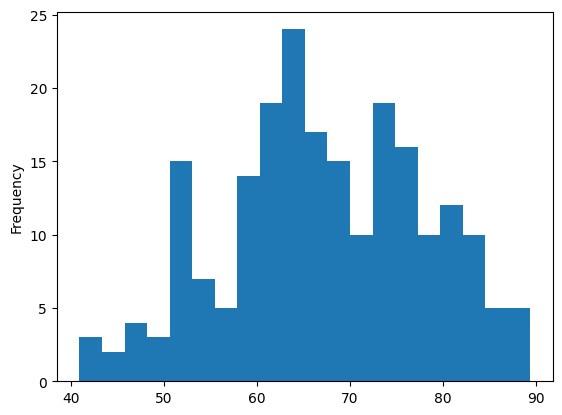

In [18]:
df['ssc_p'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

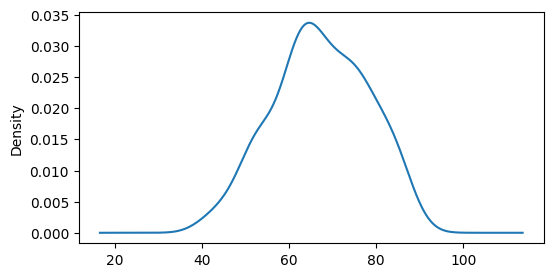

In [19]:
df['ssc_p'].plot(kind='kde',figsize=(6, 3))

In [20]:
df['ssc_p'].skew()

-0.13264949031456927

<Axes: >

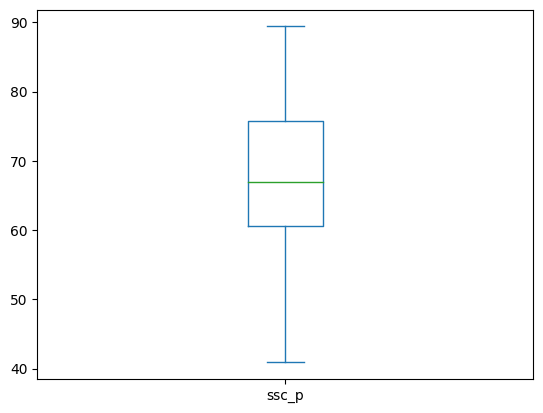

In [21]:
df['ssc_p'].plot(kind='box')

In [22]:
df['ssc_p'].isnull().sum()

0

In [23]:
df['hsc_p'].describe()

count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: hsc_p, dtype: float64

<Axes: ylabel='Frequency'>

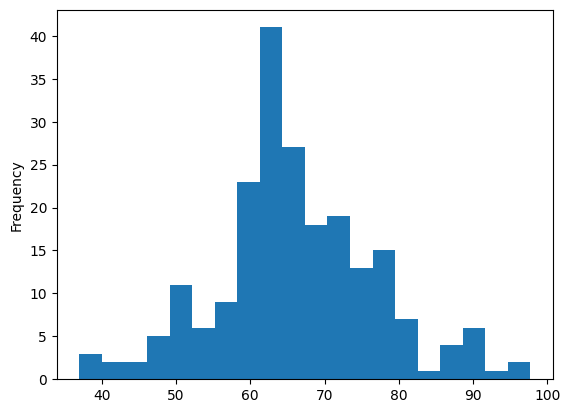

In [24]:
df['hsc_p'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

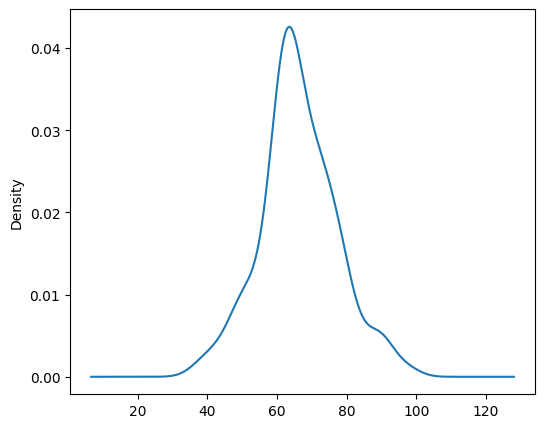

In [25]:
df['hsc_p'].plot(kind='kde',figsize=(6,5))

In [26]:
df['hsc_p'].skew()

0.16363913146416115

perfectly symetrical distribution

<Axes: >

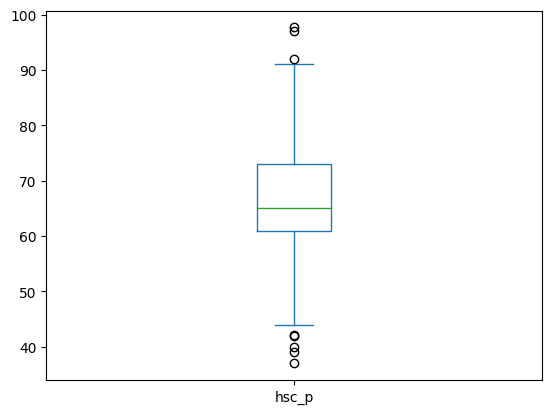

In [27]:
df['hsc_p'].plot(kind='box')

In [28]:
df['hsc_p'].isnull().sum()

0

In [29]:
df[df['hsc_p']>90]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.0,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
24,25,M,76.50,Others,97.7,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
78,79,M,84.00,Others,90.9,Others,Science,64.50,Sci&Tech,No,86.04,Mkt&Fin,59.42,Placed,270000.0
134,135,F,77.44,Central,92.0,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
177,178,F,73.00,Central,97.0,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [30]:
df['degree_p'].describe()

count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

<Axes: ylabel='Frequency'>

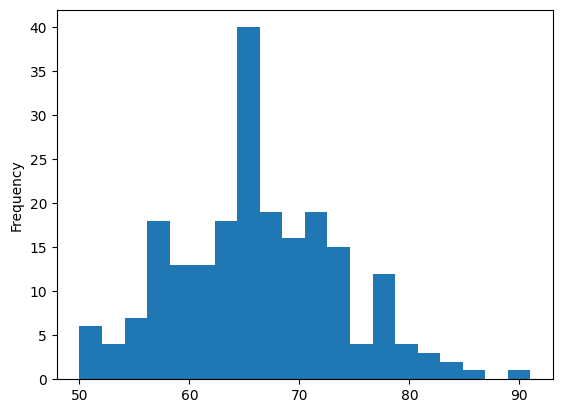

In [31]:
df['degree_p'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

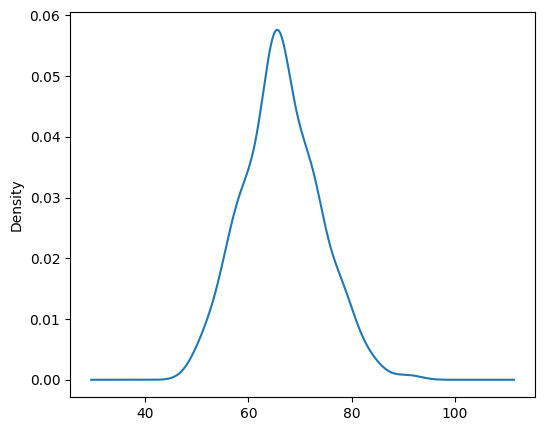

In [32]:
df['degree_p'].plot(kind='kde',figsize=(6,5))

<Axes: >

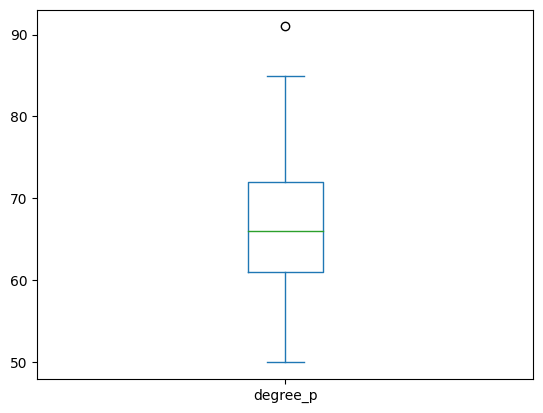

In [33]:
df['degree_p'].plot(kind='box')

In [34]:
df[df['degree_p']>85]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
197,198,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


In [35]:
df['entrance test'].describe()

count    215.000000
mean      72.100558
std       13.275956
min       50.000000
25%       60.000000
50%       71.000000
75%       83.500000
max       98.000000
Name: entrance test, dtype: float64

<Axes: ylabel='Frequency'>

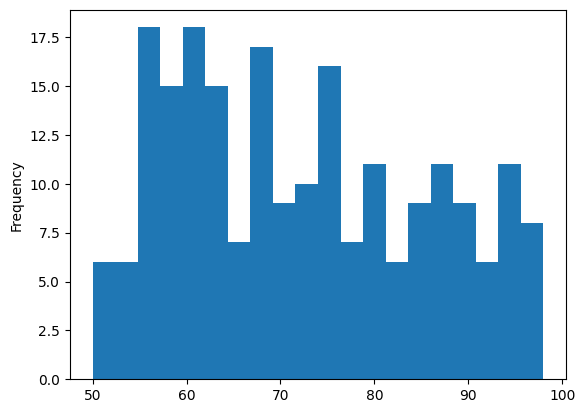

In [36]:
df['entrance test'].plot(kind='hist',bins=20)


<Axes: ylabel='Density'>

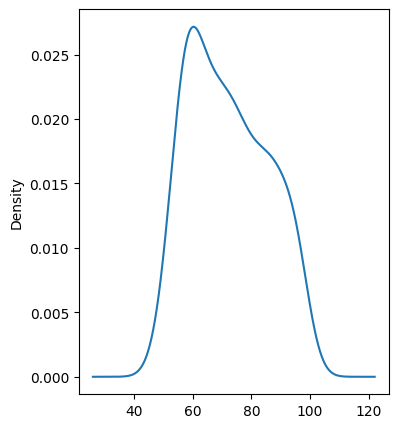

In [37]:
df['entrance test'].plot(kind='kde',figsize=(4,5))

<Axes: >

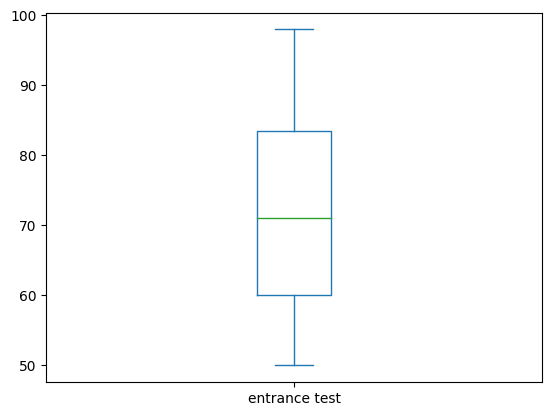

In [38]:
df['entrance test'].plot(kind='box')

In [39]:
df['entrance test'].skew()

0.28230815846982243

In [40]:
df['mba_p'].describe()

count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

<Axes: ylabel='Frequency'>

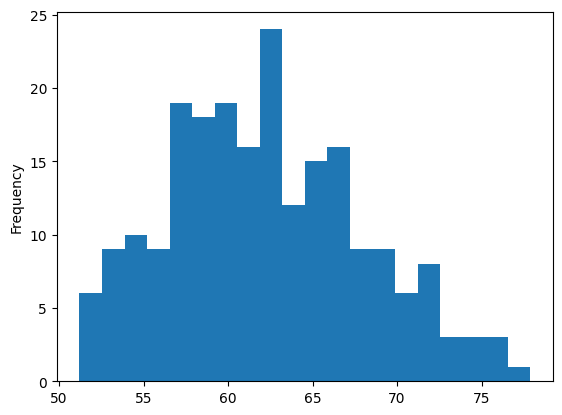

In [41]:
df['mba_p'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

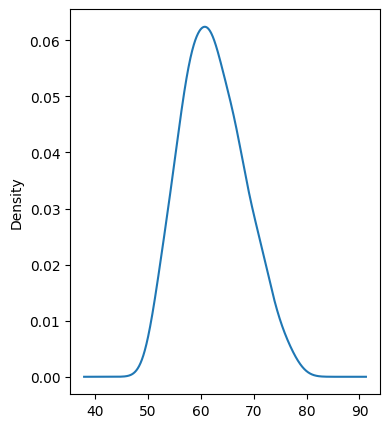

In [42]:
df['mba_p'].plot(kind='kde',figsize=(4,5))

<Axes: >

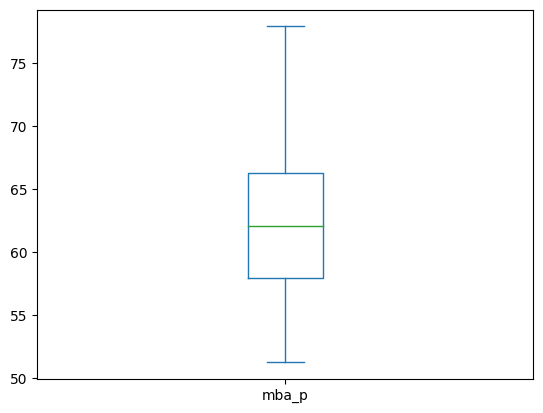

In [43]:
df['mba_p'].plot(kind='box')

In [44]:
df['mba_p'].skew()

0.31357565317840763

In [45]:
df['salary'].describe()

count       215.000000
mean     288655.405405
std       77457.900102
min      200000.000000
25%      250000.000000
50%      288655.405405
75%      288655.405405
max      940000.000000
Name: salary, dtype: float64

<Axes: ylabel='Frequency'>

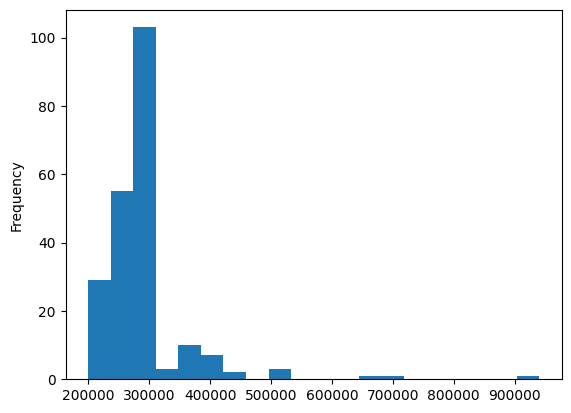

In [46]:
df['salary'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

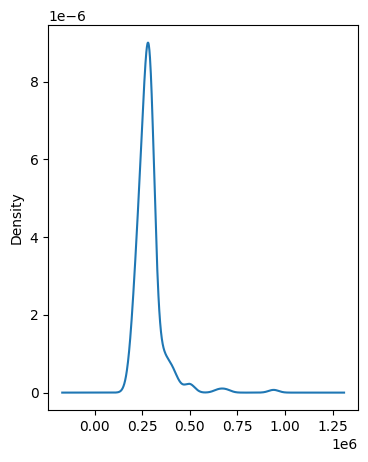

In [47]:
df['salary'].plot(kind='kde',figsize=(4,5))

<Axes: >

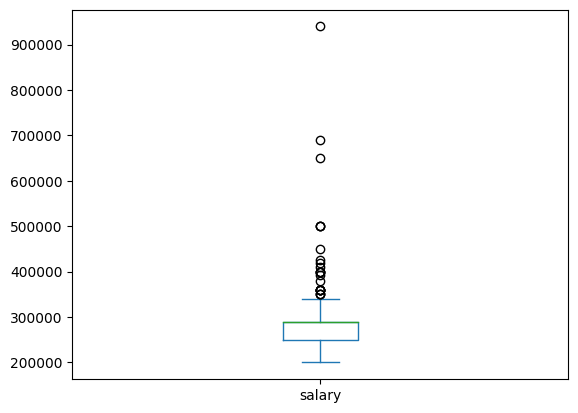

In [48]:
df['salary'].plot(kind="box")

In [49]:
df[df['salary']>35000]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [50]:
df['salary'].skew()

4.288798850070048

In [51]:
df['status'].count()                                                            #Univariate Analysis perform all coloumns

215

In [52]:
df['status'].value_counts()


status
Placed        148
Not Placed     67
Name: count, dtype: int64

<Axes: xlabel='status'>

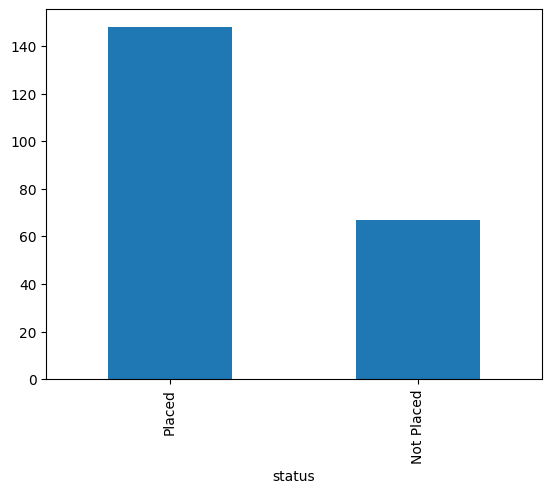

In [53]:
df['status'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

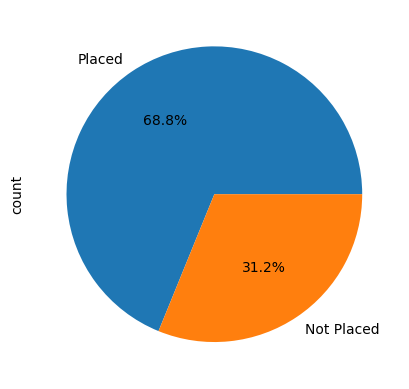

In [54]:
df['status'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
df['degree_t'].count()

215

In [56]:
df['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

<Axes: xlabel='degree_t'>

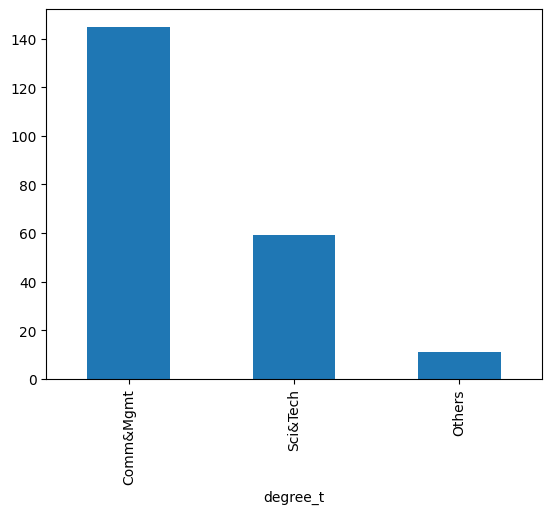

In [57]:
df['degree_t'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

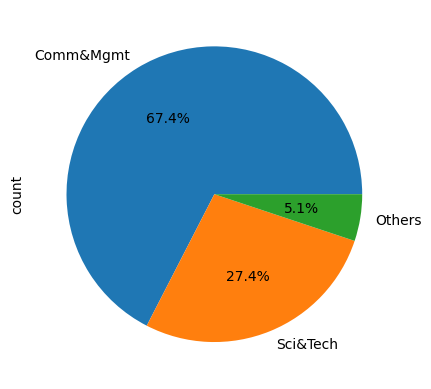

In [58]:
df['degree_t'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [59]:
df['hsc_s'].count()

215

In [60]:
df['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

<Axes: xlabel='hsc_s'>

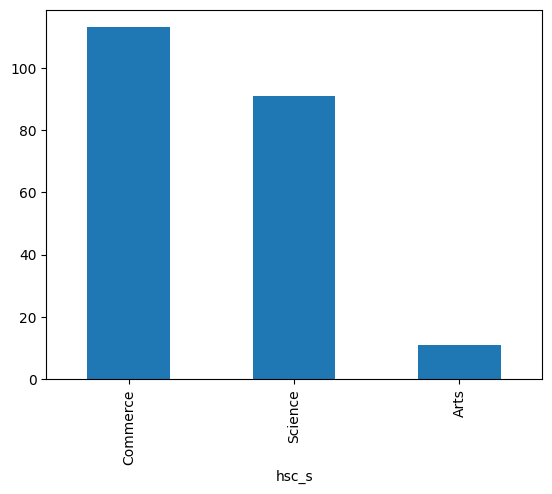

In [61]:
df['hsc_s'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

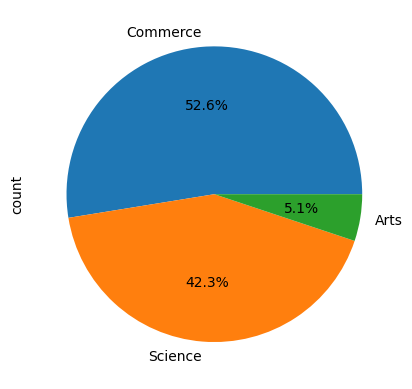

In [62]:
df['hsc_s'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [63]:
df['specialisation'].count()

215

In [64]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

<Axes: xlabel='specialisation'>

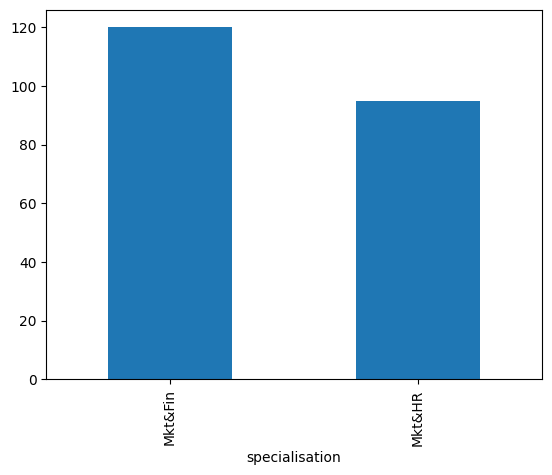

In [65]:
df['specialisation'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

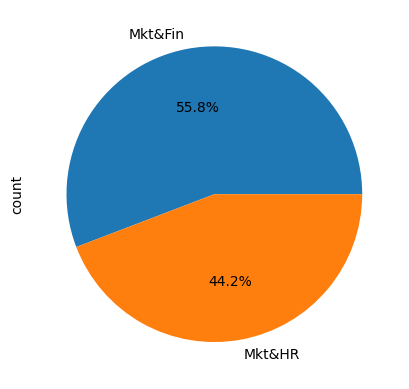

In [66]:
df['specialisation'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [67]:
df['work_exprience'].count()

215

In [68]:
df['work_exprience'].value_counts()

work_exprience
No     141
Yes     74
Name: count, dtype: int64

<Axes: xlabel='work_exprience'>

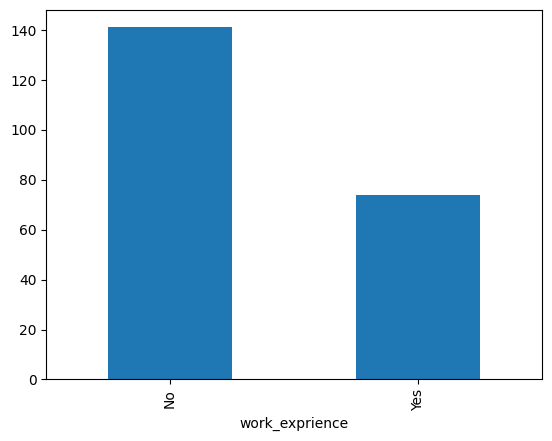

In [69]:
df['work_exprience'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

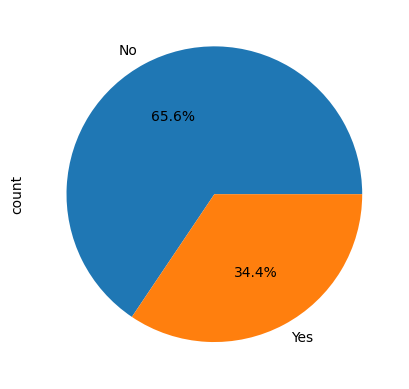

In [70]:
df['work_exprience'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [71]:
    df['ssc_b'].count()         

215

In [72]:
df['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

<Axes: xlabel='ssc_b'>

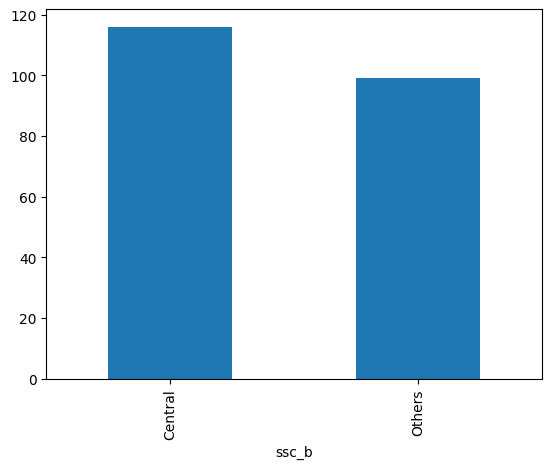

In [73]:
df['ssc_b'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

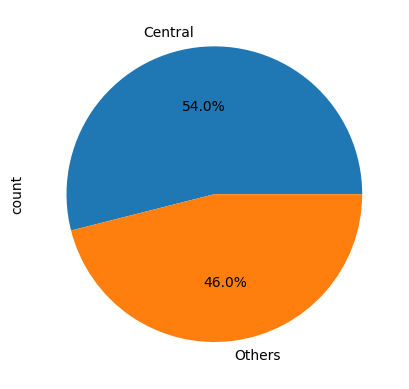

In [74]:
df['ssc_b'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [75]:
df['hsc_s'].count()

215

In [76]:
df['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

<Axes: xlabel='hsc_b'>

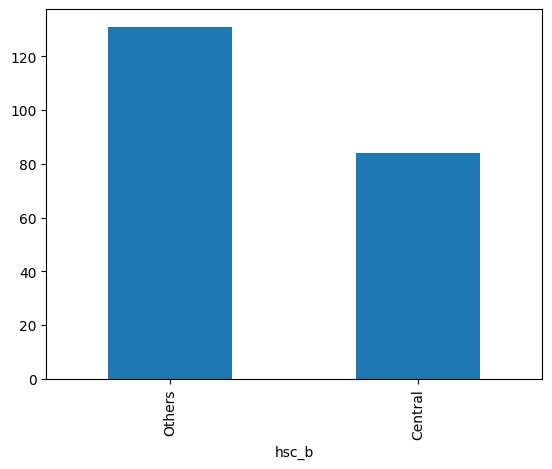

In [77]:
df['hsc_b'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

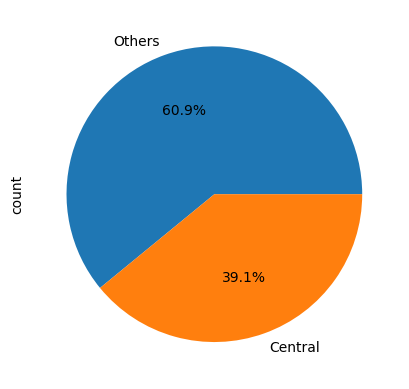

In [78]:
df['hsc_b'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [79]:
df['gender'].count()

215

In [80]:
df['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

<Axes: xlabel='gender'>

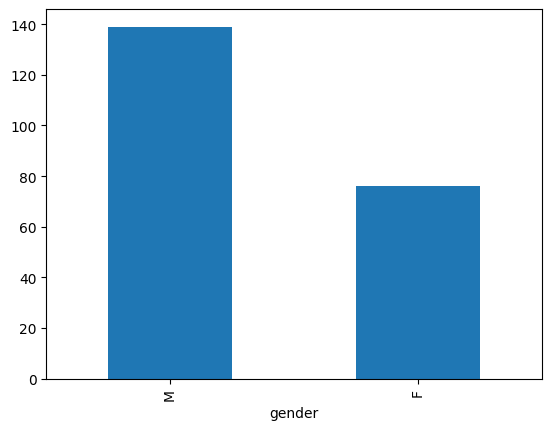

In [81]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

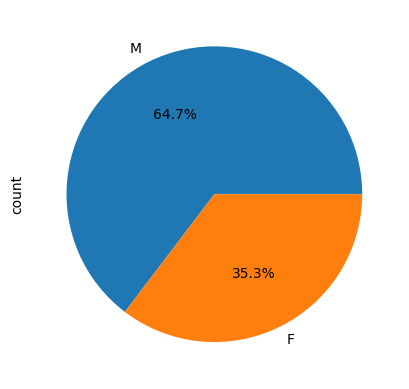

In [82]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [83]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


#  bivarient analysis

In [84]:
pd.crosstab(df['status'],df['gender'])                #Bivarient analysis of two categorical coloumns

gender,F,M
status,,
Not Placed,28,39
Placed,48,100


In [85]:
pd.crosstab(df['status'],df['gender'],normalize='columns')*100

gender,F,M
status,,
Not Placed,36.842105,28.057554
Placed,63.157895,71.942446


In [86]:
pd.crosstab(df['ssc_b'],df['status'])

status,Not Placed,Placed
ssc_b,,
Central,38,78
Others,29,70


<Axes: xlabel='gender', ylabel='status'>

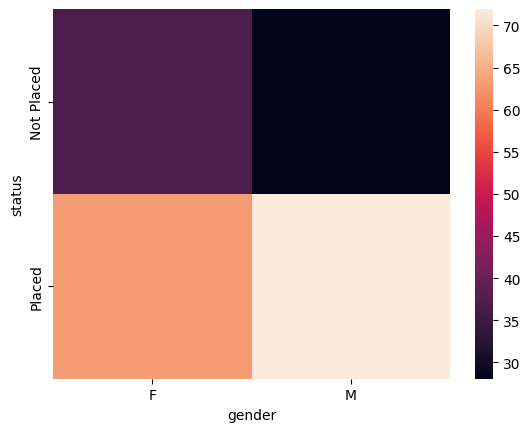

In [87]:
sns.heatmap(pd.crosstab(df['status'],df['gender'],normalize='columns')*100)

In [88]:
pd.crosstab(df['status'],df['ssc_b'],normalize='columns')*100

ssc_b,Central,Others
status,,
Not Placed,32.758621,29.292929
Placed,67.241379,70.707071


<Axes: xlabel='ssc_b', ylabel='status'>

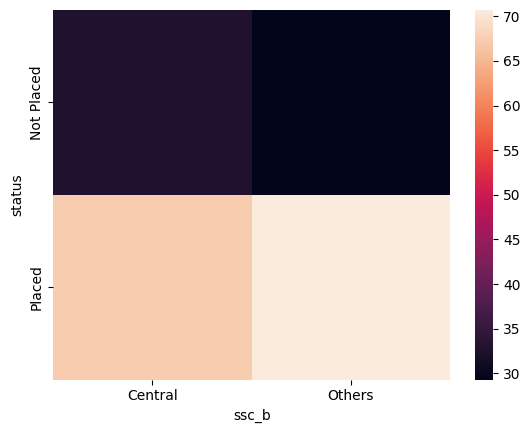

In [89]:
sns.heatmap(pd.crosstab(df['status'],df['ssc_b'],normalize='columns')*100)

In [90]:
pd.crosstab(df['status'],df['hsc_b'])

hsc_b,Central,Others
status,,
Not Placed,27,40
Placed,57,91


In [91]:
pd.crosstab(df['status'],df['hsc_b'],normalize='columns')*100

hsc_b,Central,Others
status,,
Not Placed,32.142857,30.534351
Placed,67.857143,69.465649


<Axes: xlabel='hsc_b', ylabel='status'>

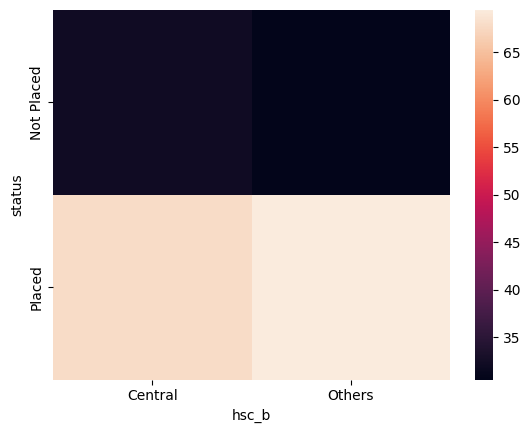

In [92]:
sns.heatmap(pd.crosstab(df['status'],df['hsc_b'],normalize='columns')*100)

In [93]:
pd.crosstab(df['status'],df['hsc_s'])

hsc_s,Arts,Commerce,Science
status,,,
Not Placed,5,34,28
Placed,6,79,63


In [94]:
pd.crosstab(df['status'],df['hsc_s'],normalize='columns')*100

hsc_s,Arts,Commerce,Science
status,,,
Not Placed,45.454545,30.088496,30.769231
Placed,54.545455,69.911504,69.230769


<Axes: xlabel='hsc_s', ylabel='status'>

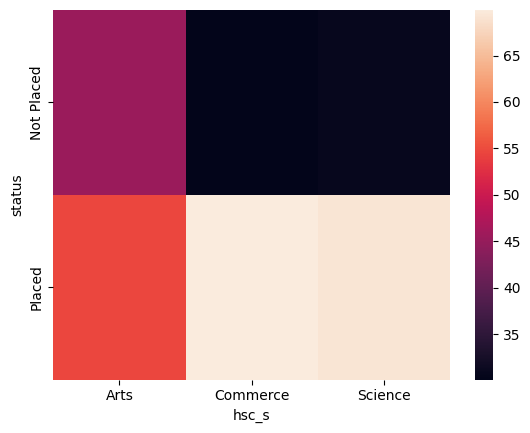

In [95]:
sns.heatmap(pd.crosstab(df['status'],df['hsc_s'],normalize='columns')*100)

In [96]:
pd.crosstab(df['status'],df['degree_t'])

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,43,6,18
Placed,102,5,41


In [97]:
pd.crosstab(df['status'],df['degree_t'],normalize='columns')*100

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,29.655172,54.545455,30.508475
Placed,70.344828,45.454545,69.491525


<Axes: xlabel='degree_t', ylabel='status'>

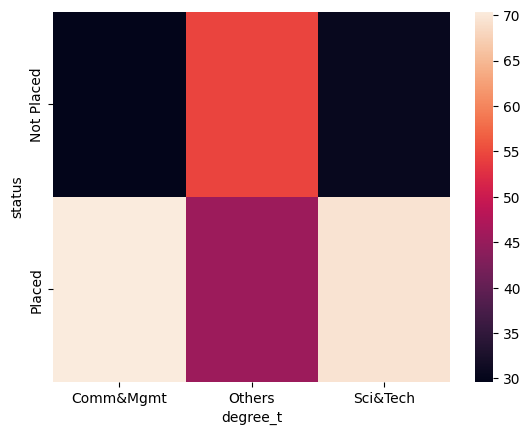

In [98]:
sns.heatmap(pd.crosstab(df['status'],df['degree_t'],normalize='columns')*100)

In [99]:
pd.crosstab(df['status'],df['work_exprience'])

work_exprience,No,Yes
status,,
Not Placed,57,10
Placed,84,64


In [100]:
pd.crosstab(df['status'],df['work_exprience'],normalize='columns')*100

work_exprience,No,Yes
status,,
Not Placed,40.425532,13.513514
Placed,59.574468,86.486486


<Axes: xlabel='work_exprience', ylabel='status'>

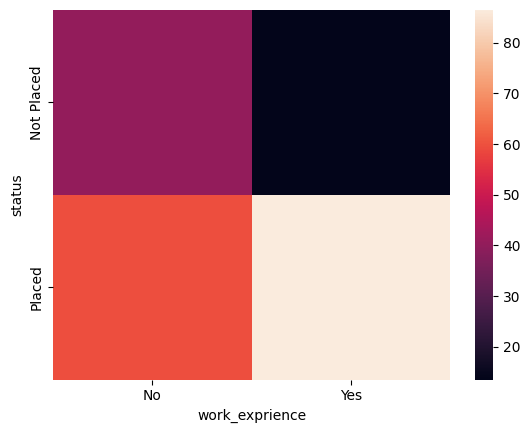

In [101]:
sns.heatmap(pd.crosstab(df['status'],df['work_exprience'],normalize='columns')*100)

In [102]:
pd.crosstab(df['status'],df['specialisation'])

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


In [103]:
pd.crosstab(df['status'],df['specialisation'],normalize='columns')*100

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,20.833333,44.210526
Placed,79.166667,55.789474


<Axes: xlabel='specialisation', ylabel='status'>

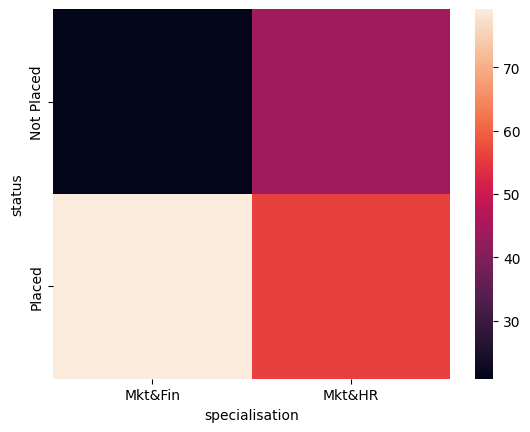

In [104]:
sns.heatmap(pd.crosstab(df['status'],df['specialisation'],normalize='columns')*100)

# Bivarient Analysis between categorical and numerical data


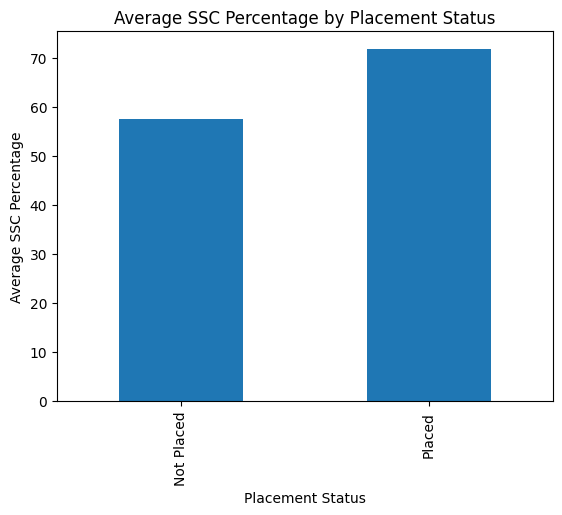

In [105]:
# Bar chart to compare the average SSC percentage for each placement status        
df.groupby('status')['ssc_p'].mean().plot(kind='bar')
plt.title('Average SSC Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Average SSC Percentage')
plt.show()

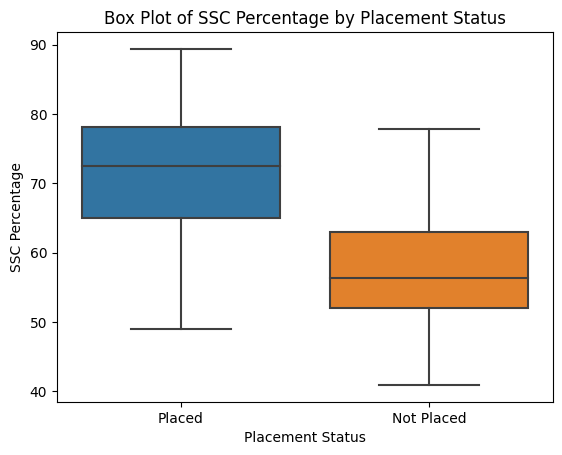

In [106]:
# Box plot to compare SSC percentage for each placement status
sns.boxplot(x='status', y='ssc_p', data=df)
plt.title('Box Plot of SSC Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('SSC Percentage')
plt.show()

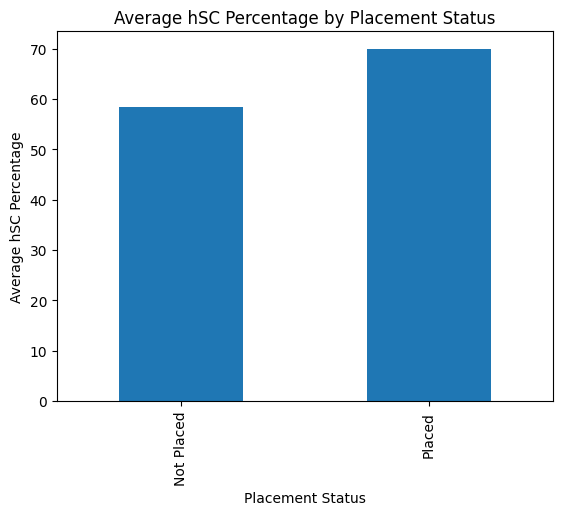

In [107]:
# Bar chart to compare the average hSC percentage for each placement status
df.groupby('status')['hsc_p'].mean().plot(kind='bar')
plt.title('Average hSC Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Average hSC Percentage')
plt.show()

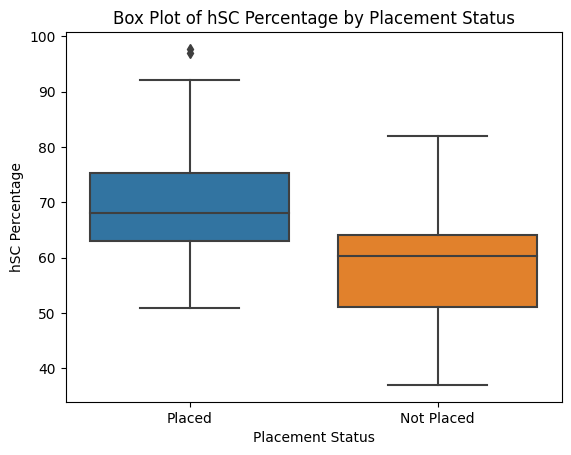

In [108]:
# Box plot to compare SSC percentage for each placement status
sns.boxplot(x='status', y='hsc_p', data=df)
plt.title('Box Plot of hSC Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('hSC Percentage')
plt.show()

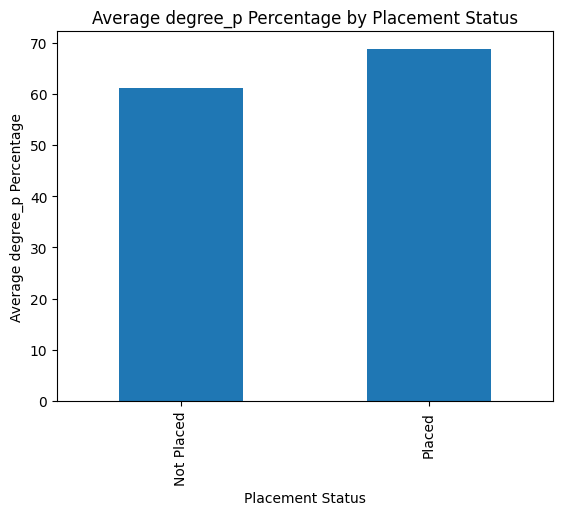

In [109]:
# Bar chart to compare the average degree_p percentage for each placement status
df.groupby('status')['degree_p'].mean().plot(kind='bar')
plt.title('Average degree_p Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Average degree_p Percentage')
plt.show()

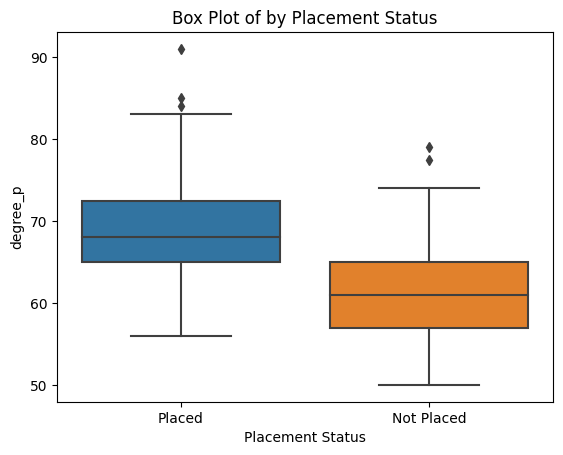

In [110]:
# Box plot to compare degree_p for each placement status
sns.boxplot(x='status', y='degree_p', data=df)
plt.title('Box Plot of by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('degree_p')
plt.show()

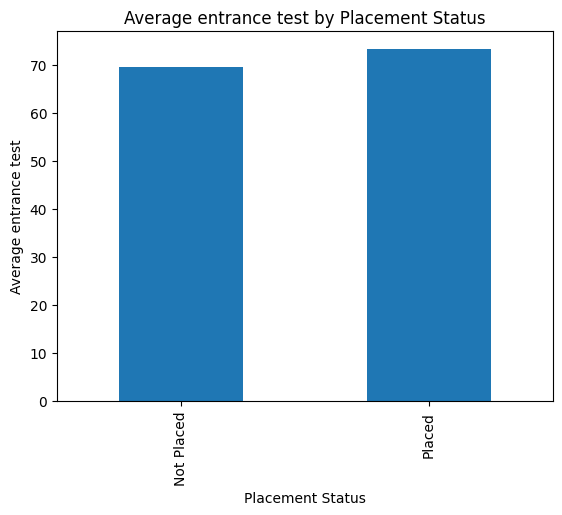

In [111]:
# Bar chart to compare the averageentrance entrance test for each placement status
df.groupby('status')['entrance test'].mean().plot(kind='bar')
plt.title('Average entrance test by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Average entrance test')
plt.show()

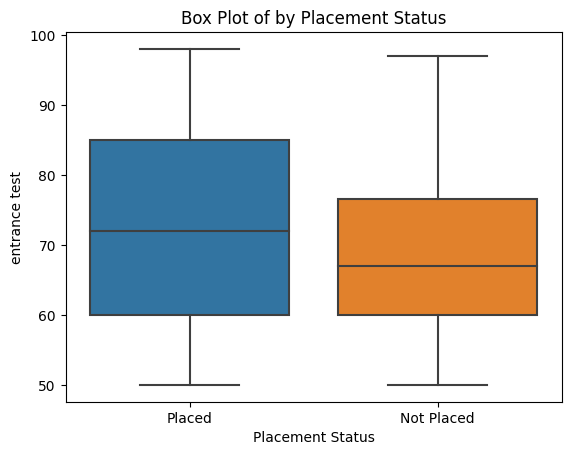

In [112]:
# Box plot to compare degree_p for each placement status
sns.boxplot(x='status', y='entrance test', data=df)
plt.title('Box Plot of by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('entrance test')
plt.show()

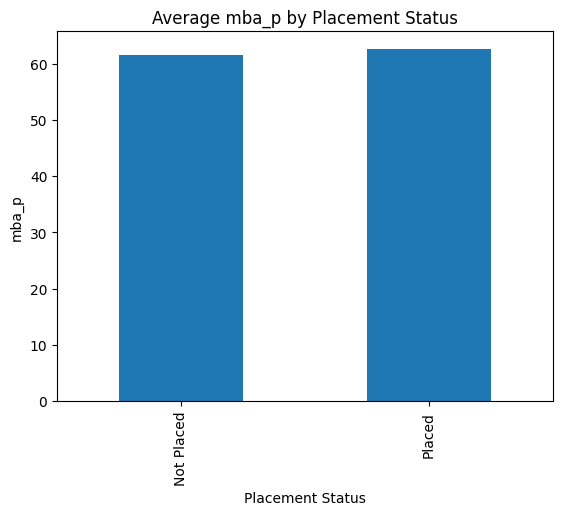

In [113]:
# Bar chart to compare the averageentrance mba_p for each placement status
df.groupby('status')['mba_p'].mean().plot(kind='bar')
plt.title('Average mba_p by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('mba_p')
plt.show()

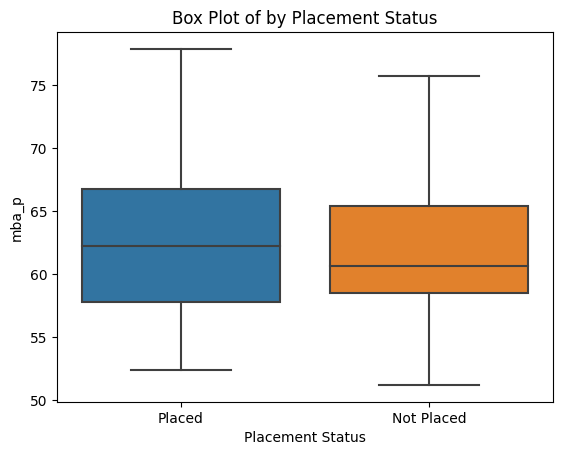

In [114]:
# Box plot to compare mba_p for each placement status
sns.boxplot(x='status', y='mba_p', data=df)
plt.title('Box Plot of by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('mba_p')
plt.show()

In [115]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,work_exprience,entrance test,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


# Multivarient Analysis

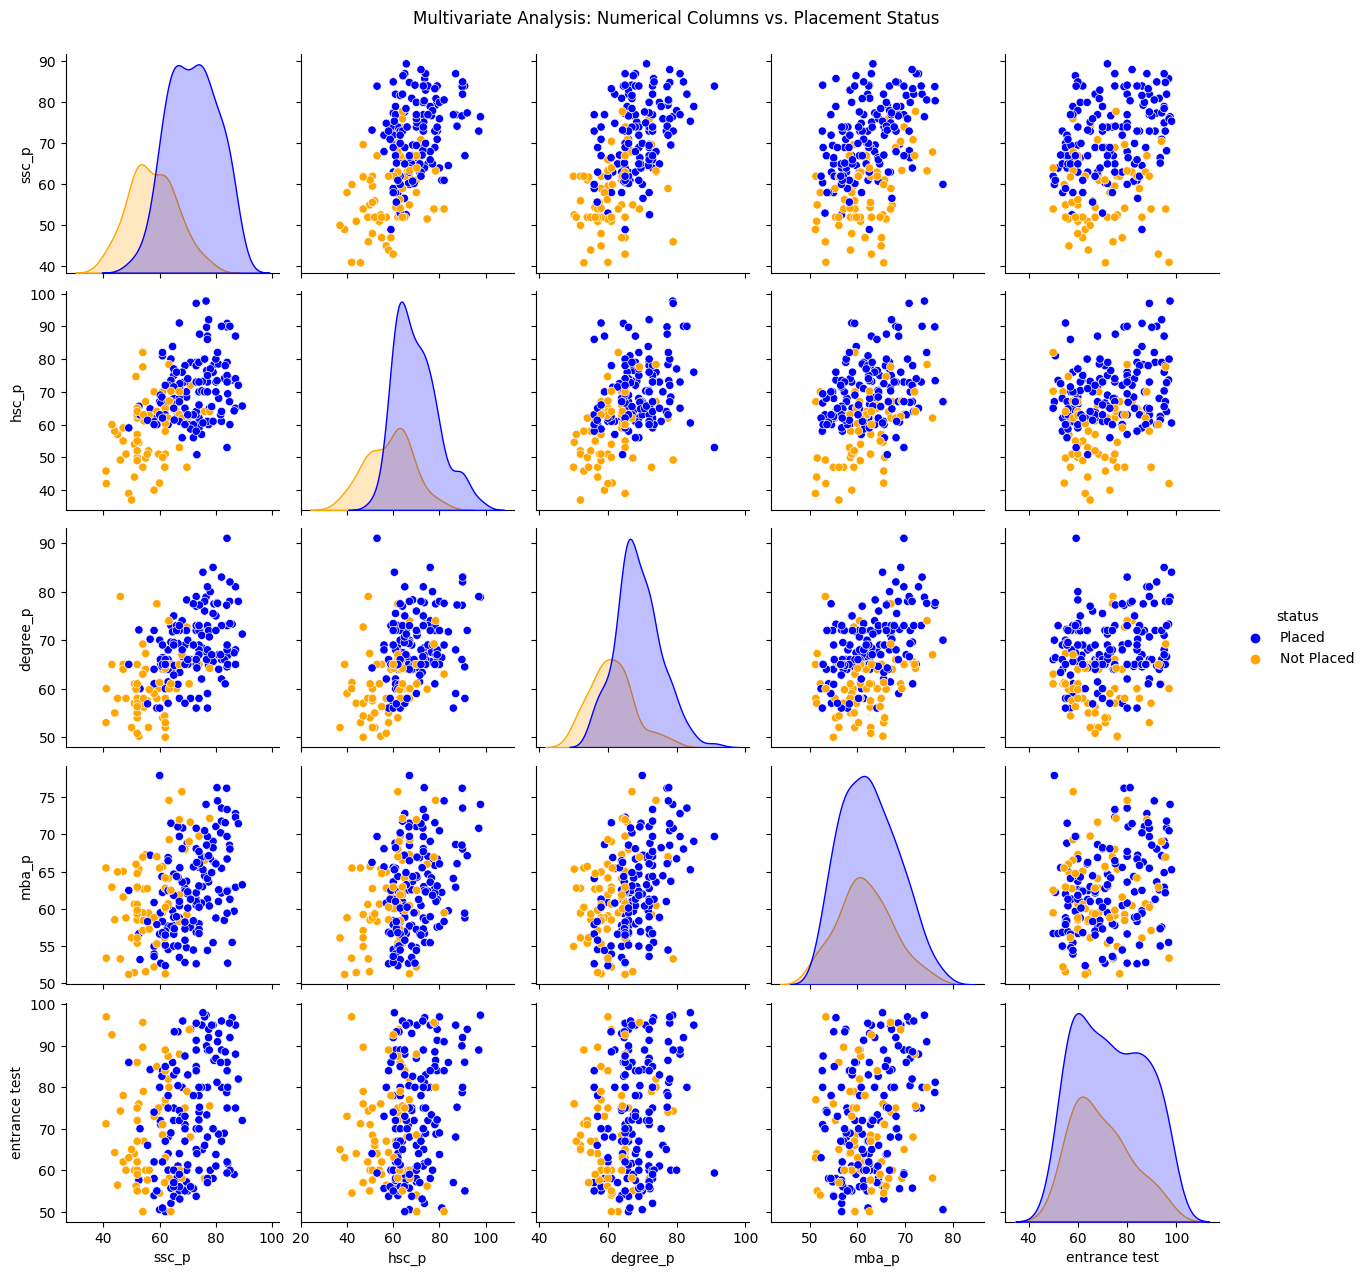

In [116]:
# Select numerical columns (excluding 'salary') for multivariate analysis       #there Are use in paire plot graph
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'entrance test']

# Pairplot to visualize relationships between numerical columns based on 'status'
sns.pairplot(df, hue='status', vars=numerical_columns, diag_kind='kde', palette={'Placed': 'blue', 'Not Placed': 'orange'})
plt.suptitle('Multivariate Analysis: Numerical Columns vs. Placement Status', y=1.02)
plt.show()

In [117]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

In [118]:
numeric_columns.head(3)                 


,sl_no,ssc_p,hsc_p,degree_p,entrance test,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0


In [119]:
 correlation_matrix 

,sl_no,ssc_p,hsc_p,degree_p,entrance test,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
entrance test,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


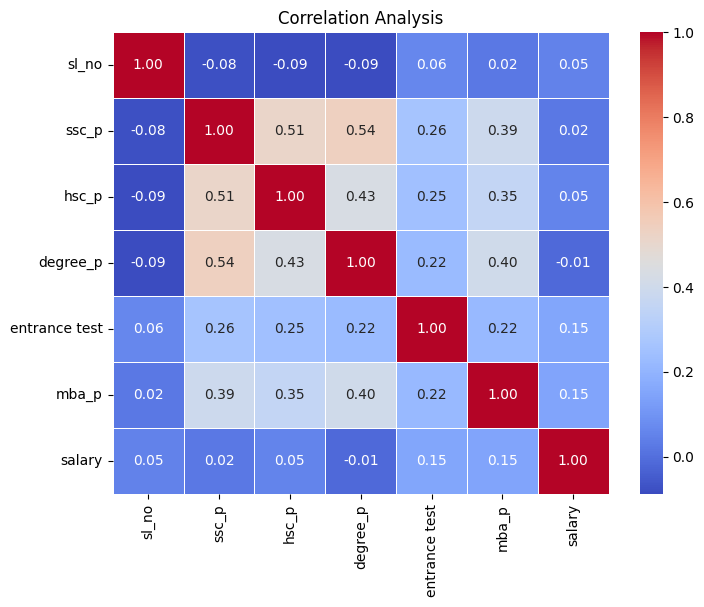

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Analysis")
plt.show()

 Secondary education percentage (ssc_p), higher secondary education percentage (hsc_p), and undergraduate degree percentage (degree_p) show a clear positive correlation with placement status.
 Entrance test scores and MBA percentages seem to have a weaker correlation.

# Hypothesis Generation:

In [121]:
# Convert 'Placed' and 'Not Placed' to numeric values
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

# Extract numerical columns
numeric_columns = df[['ssc_p', 'hsc_p', 'degree_p', 'entrance test', 'mba_p', 'salary', 'status']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation with placement status
status_correlation = correlation_matrix['status'].drop('status')
print(status_correlation)


ssc_p            6.078887e-01
hsc_p            4.912279e-01
degree_p         4.798610e-01
entrance test    1.276394e-01
mba_p            7.692165e-02
salary           8.369129e-17
Name: status, dtype: float64


In [122]:
# Your correlation values
correlation_values = {
    'ssc_p': 6.078887e-01,
    'hsc_p': 4.912279e-01,
    'degree_p': 4.798610e-01,
    'entrance test': 1.276394e-01,
    'mba_p': 7.692165e-02,
    'salary': 8.369129e-17
}

# Convert values to standard notation
converted_values = {key: f"{value:.8f}" for key, value in correlation_values.items()}

# Print converted values
for key, value in converted_values.items():
    print(f"{key}: {value}")


ssc_p: 0.60788870
hsc_p: 0.49122790
degree_p: 0.47986100
entrance test: 0.12763940
mba_p: 0.07692165
salary: 0.00000000


ssc_p (Secondary Education Percentage): The correlation coefficient is approximately 0.61, indicating a moderate positive correlation. This suggests that a higher secondary education percentage is associated with a higher likelihood of placement. 

hsc_p (Higher Secondary Education Percentage): The correlation coefficient is approximately 0.49, indicating a moderate positive correlation. Similar to 'ssc_p,' a higher percentage in higher secondary education is associated with a higher likelihood of placement.

degree_p (Degree Percentage): The correlation coefficient is approximately 0.48, indicating a moderate positive correlation. This suggests that a higher percentage in the degree is associated with a higher likelihood of placement.

entrance test: The correlation coefficient is approximately 0.13, indicating a weak positive correlation. This suggests that the entrance test performance is less strongly correlated with placement compared to the other variables.

mba_p (MBA Percentage): The correlation coefficient is approximately 0.08, indicating a weak positive correlation. Similar to the entrance test, the MBA percentage is less strongly correlated with placement. salary: The correlation coefficient is very close to zero (1.28e-17), suggesting no meaningful correlation between salary and placement status. This makes sense because salary is likely influenced by placement.

# Further Data Exploration:

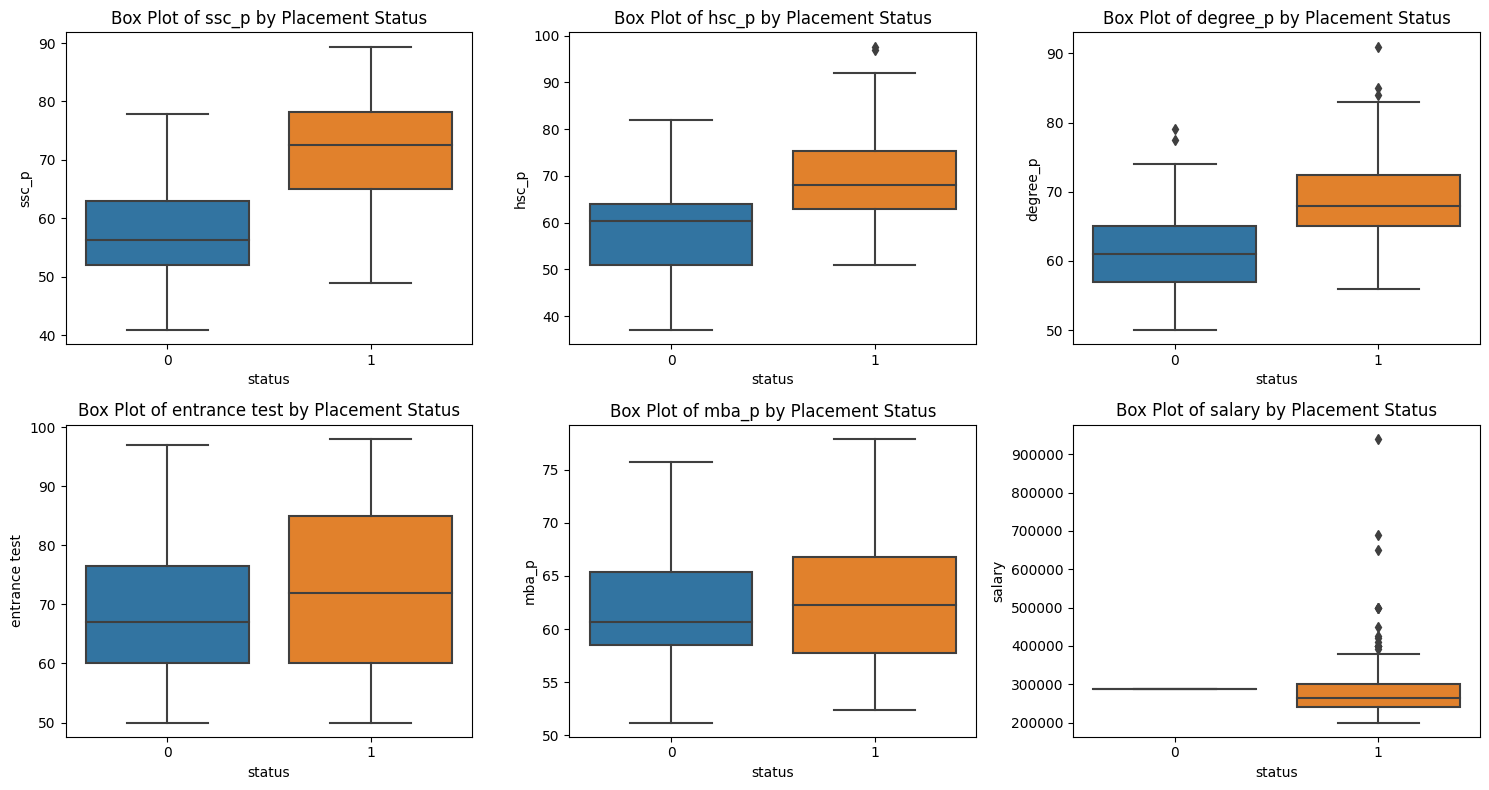

In [123]:
# Box plots for numerical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'entrance test', 'mba_p', 'salary']

plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=column, data=df)
    plt.title(f'Box Plot of {column} by Placement Status')

plt.tight_layout()
plt.show()


Secondary education percentage (ssc_p), higher secondary education percentage (hsc_p), and undergraduate degree percentage (degree_p) show a clear positive correlation with placement status.

Entrance test scores and MBA percentages seem to have a weaker correlation.

Salary, not surprisingly, strongly correlates with placement status.

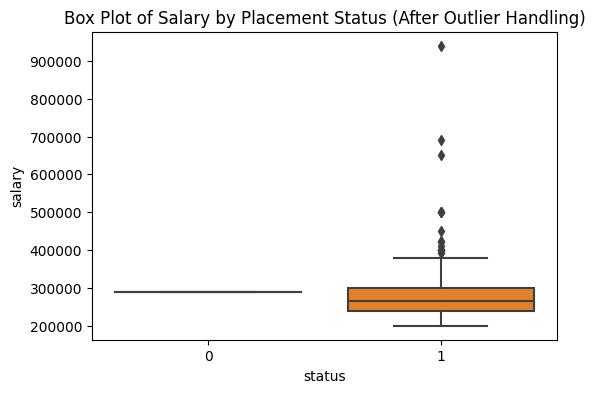

In [124]:
# Re-run the box plot for 'salary' after handling outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='salary', data=df)
plt.title('Box Plot of Salary by Placement Status (After Outlier Handling)')
plt.show()

# Hypothesis testing


In [125]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['status'], df['gender'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
if p < 0.05:
    print("There is a significant difference in placement based on gender.")
else:
    print("There is no significant difference in placement based on gender.")

Chi-square value: 1.3817539668505106
P-value: 0.23980260881037568
There is no significant difference in placement based on gender.


In [126]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_board = pd.crosstab(df['status'], df['ssc_b'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table_board)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant impact of secondary education board on placement.")
else:
    print("There is no significant impact of secondary education board on placement.")


Chi-square value: 0.15933127499487468
P-value: 0.6897729431530739
There is no significant impact of secondary education board on placement.


In [127]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_workexp = pd.crosstab(df['status'], df['work_exprience'])

# Perform chi-square test
chi2_workexp, p_value_workexp, _, _ = chi2_contingency(contingency_table_workexp)

# Print the results
print(f"Chi-square value: {chi2_workexp}")
print(f"P-value: {p_value_workexp}")

# Interpret the results
if p_value_workexp < 0.05:
    print("Work experience significantly influences placement.")
else:
    print("Work experience does not significantly influence placement.")

Chi-square value: 15.154425347637423
P-value: 9.906584720516492e-05
Work experience significantly influences placement.


# Machine Learning Model Evaluation  :



In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [129]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame with the processed data

# Separate features and target variable
X = df.drop('status', axis=1)  # Features
y = df['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.93

Confusion Matrix:
[[10  2]
 [ 1 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.94      0.97      0.95        31

    accuracy                           0.93        43
   macro avg       0.92      0.90      0.91        43
weighted avg       0.93      0.93      0.93        43



# Fine-Tuning the Model:

In [130]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is your DataFrame with the processed data

# Separate features and target variable
X = df.drop('status', axis=1)  # Features
y = df['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

# Define the parameter grid to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_model.predict(X_test)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("\nModel Evaluation After Fine-Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Model Evaluation After Fine-Tuning:
Accuracy: 0.9302325581395349
Confusion Matrix:
 [[10  2]
 [ 1 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.94      0.97      0.95        31

    accuracy                           0.93        43
   macro avg       0.92      0.90      0.91        43
weighted avg       0.93      0.93      0.93        43



Chi-square value for gender: 1.3817539668505106
P-value for gender: 0.23980260881037568


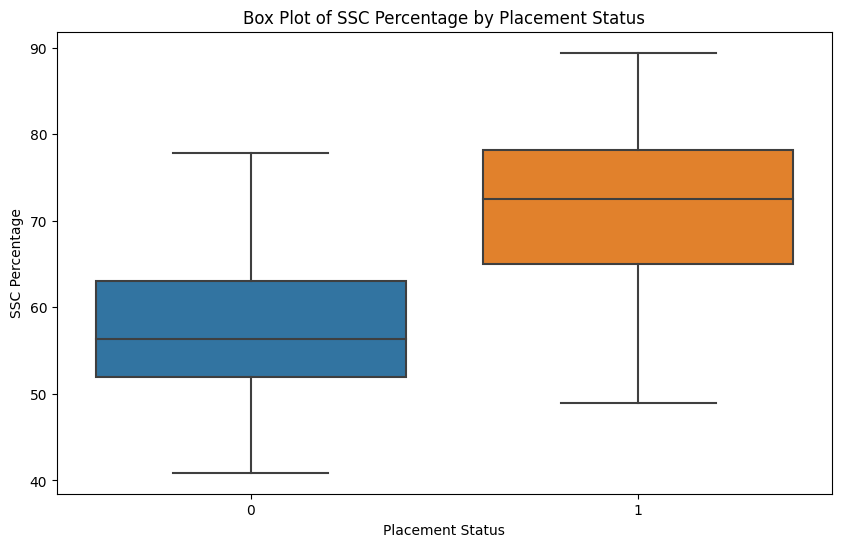

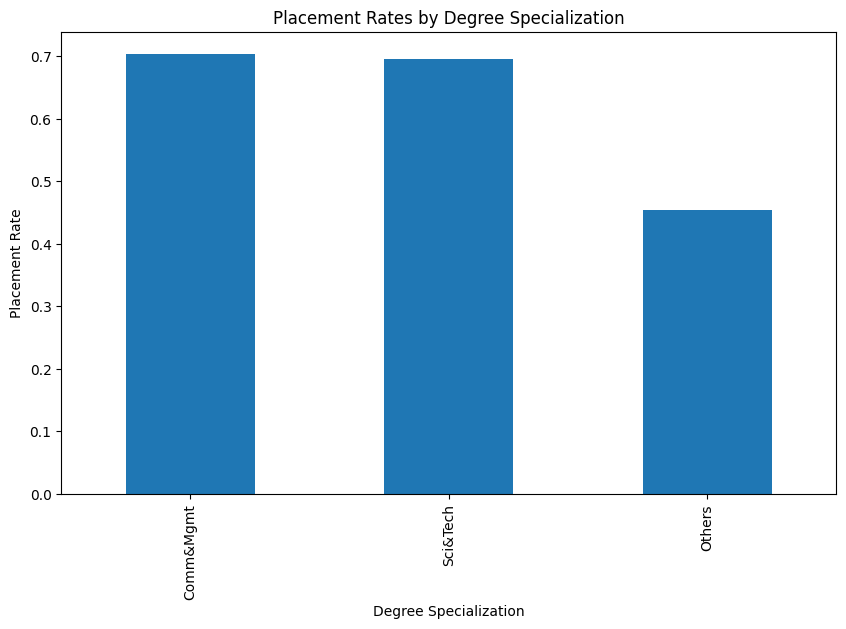

In [131]:
# Analyzing factors influencing placement
# Example: Analyzing the impact of gender on placement
contingency_table_gender = pd.crosstab(df['status'], df['gender'])
chi2_gender, p_value_gender, _, _ = chi2_contingency(contingency_table_gender)

print(f"Chi-square value for gender: {chi2_gender}")
print(f"P-value for gender: {p_value_gender}")

# Repeat similar analysis for other factors and percentages
# ...

# Analyzing the impact of academic percentages on placement
# Example: SSC percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='ssc_p', data=df)
plt.title('Box Plot of SSC Percentage by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('SSC Percentage')
plt.show()

# Repeat similar analysis for other percentages (HSC, degree, etc.)
# ...

# Analyzing the demand for degree specializations
plt.figure(figsize=(10, 6))
df.groupby('degree_t')['status'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Placement Rates by Degree Specialization')
plt.xlabel('Degree Specialization')
plt.ylabel('Placement Rate')
plt.show()

# Repeat similar analysis for other factors (work experience, entrance test, etc.)
# ...
